# Assignment 3
Rosa Kurtz

### 1) Area of a Unit Circle

In [6]:
# Area of a circle - Riemann Sum (a)
import matplotlib        as mpl
import matplotlib.pyplot as plt

import scipy.integrate as integrate

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

#f = 1-x**2
N=2

goal = .000001
#all points are n(h)+h/2 from n to N-1
error=1

while error > goal:
    h=1/N
    A=0
    for n in range(0, N-1):
        x = n*h + h/2
        f = sqrt(1 - x**2)
        A = A + f*h
         
    A=4*A
    error=abs(pi-A) 
    N=N*2
    

print('error:' ,error)
E=abs(pi-A)/pi
#3.141
print('intervals:' , N)
print('estimate:' , A)
print('exact:   ' , pi)
print('     ')
print('fractional error:' , E)



error: 6.162793555475332e-07
intervals: 65536
estimate: 3.1415920373104376
exact:    3.141592653589793
     
fractional error: 1.9616781152175516e-07


In [8]:
# Area of a circle - Trapezoidal Method (b)
import matplotlib        as mpl
import matplotlib.pyplot as plt

import scipy.integrate as integrate

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

goal = .000001
error=1

N=2

while error > goal:
    h=1/N
    A=0
    for n in range(0,N-1):
        x1=n*h
        x2=(n+1)*h
        f1 = sqrt(1 - x1**2)
        f2 = sqrt(1 - x2**2)
        A = A+((h/2)*(f2+f1))
    A=4*A
    error=abs(pi-A) 
    N=N*2


print('error:' ,error)
E=abs(pi-A)/pi

    
print('intervals:' , N)    
print('estimate:' , A)
print('exact:   ' , pi)
print('     ')
print('fractional error:' , E)

error: 6.750890744200433e-07
intervals: 65536
estimate: 3.1415919785007187
exact:    3.141592653589793
     
fractional error: 2.148875264425646e-07


In [10]:
# Area of a circle - Simpson's Rule (c)
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

goal = .000001
error=1

N=2

while error > goal:
    h=1/N
    A=0
    for n in range(1,N-1):
        if(n%2==1):
            x_odd=(n)*h
            f_odd = sqrt(1 - x_odd**2)
            A = A + 4*f_odd 
        if(n%2==0):
            x_even=(n)*h
            f_even = sqrt(1 - x_even**2)
            A = A + 2*f_even
    f_0=1
    f_N=0
    A = (h/3)*(A + f_0 + f_N)
    A=4*A
    error=abs(pi-A) 
    N=N*2





print('error:' ,error)
E=abs(pi-A)/pi

print('intervals:' , N)
print('estimate:' , A)
print('exact:   ' , pi)
print('     ')
print('fractional error:' , E)

error: 4.769380828051339e-07
intervals: 131072
estimate: 3.1415921766517103
exact:    3.141592653589793
     
fractional error: 1.518141068544175e-07


In [22]:
# Area of a circle - Romburg Method (d)

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt



#trapezoidal method
A=0
N=2
h=1/N

a=N
b=N

goal=.000001
error=1


R = np.zeros([a,b], dtype=float)
e = np.zeros([a,b], dtype=float)
e[-1][-1]=1


    #start with the trapezoidal rule and do the first column from 0 to n-1,
    #doubling N as you go down
    
while e[-1][-1] > goal : #eventually will be while with error statement with e=e[-1][-1]
    R = np.zeros([a,b], dtype=float)
    e = np.zeros([a,b], dtype=float)
    N=2
    for j in range(0,b):
        h=1/N
        A=0
        for n in range(0,N-1):
            x1=n*h
            x2=(n+1)*h
            f1 = sqrt(1 - x1**2)
            f2 = sqrt(1 - x2**2)
            A = A+((h/2)*(f2+f1))
        N=N*2
        A=4*A
        R[j][0]=A
        e[j][0]=abs(A-pi)
        
    #m=4
    for j in range(1,a):
        for i in range(1,j+1):
            m=(2*a)**2
            A=((4**j)*R[j][i-1]-R[j-1][i-1])/((4**j)-1)
            R[j][i]=A
            e[j][i]=abs(A-pi)
        
   
    #print(N)
    a=a+1
    b=b+1

   
   
    

E=abs(pi-R[-1][-1])/pi

print('for most accurate value:')
print('estimate:' , R[-1][-1])
print('exact:   ' , pi)
print('     ')
print('     ')
print('fractional error:' , E)   
print('     ')
print('Table of Values:')
print(R)
print('     ')
print('Table of Errors:')
print(e)



    

for most accurate value:
estimate: 3.141591978500787
exact:    3.141592653589793
     
     
fractional error: 2.1488750467343475e-07
     
Table of Values:
[[1.8660254  0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [2.66499015 2.93131174 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [2.96878841 2.98904163 2.99289029 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [3.07975488 3.08151625 3.0829841  3.08441416 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [3.11959997 3.11975623 3.11990619 3.12005098 3.12019073 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [3.13379426 3.13380814 3.13382187 3.13383548 3.13384895 3.1338

### 2) Anharmonic Oscillator

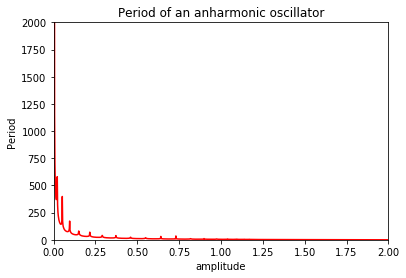

In [14]:
import numpy as np
import numpy.polynomial.legendre as legendre
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

mpl.rcParams['legend.frameon'] = False


#N=20
#a [0,2]
a=0
b=sqrt(sqrt(2))
N=20
m=1

s=1000

P=np.zeros([s], dtype=float)


#A is amplitude
A=0
for A in range(0,s-1):
    def gaussian(x):
        return 1/sqrt(abs((2*A/s)**4-x**4))
        #return 2*exp(-x**2/2)/sqrt(2*pi)
    

    x,w = legendre.leggauss(N)
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w
    I = np.dot(wp, gaussian(xp))

    
    T=I*sqrt(8*m)
    P[A]=T
    x=np.linspace(0,2,s)
    
plt.title('Period of an anharmonic oscillator')
plt.xlabel('amplitude')
plt.ylabel('Period')
plt.xlim(0,2)
plt.ylim(0,2000)
#plt.xscale(log10)

plt.plot( x, P, 'r-')

plt.show()



c) Although the mass has furthur to travel as the amplitude increases it makes sense that the period decreases because the energy formula is in the form Etotal = mga = Ekinetic = mgh where Ekinetic is proportial to v^2. this means that while the amplitude may increase linearly the speed gets faster quadratically and it follows that with a faster speed the time/period would decrease.

This also explains why the period diverges as the amplitude approaches zero because the speed decreases with the same quadratic relationship as the amplitude decreases. At T=infinity one can see that the mass would move so slowly that the speed would be so small that it would take forever to travel a full oscillation. 

### 3) Stefan-Boltzmann Constant

integration over an infinite range requires a subtitution of variables* to make the range finite, after which most techniques covered will work. After I did the substition I decided to use Simpson's rule as because it had already separated out the points where x would be zero or one, which would cause a divide by zero error in my code, but could be evaluated seperately.

(*see written work for substitution)

In [18]:
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt


N=1

k_B=1.38064852*(10**(-23)) #(m^2)(kg)/(s^2)(K)
T=273.16
c=299792458 #m/s
h_cross=1.054571726*(10**(-34)) #(m^2)(kg)/(s^3)

C = ((k_B**4)*(T**4))/((c**2)*(4*(pi**2))*((h_cross)**3))

def f(x):
    b = (x/(1-x))
    return ((x/(1-x))**3)/(((1-x)**2)*(exp((x/(1-x)))-1))

while N < 200:
    h=1/N
    A=0
    for n in range(1,N-1):
        if(n%2==1):
            x_odd=(n)*h
            f_odd = f(x_odd)
            A = A + 4*f_odd 
        if(n%2==0):
            x_even=(n)*h
            f_even = f(x_even)
            A = A + 2*f_even
    f_0=0
    f_N=0
    A = (h/3)*(A+f_N+f_0)
    
    N=N+1


s=(A*C)/(T**4)


print('evaluated integral:' , A)
print((pi**4)/15)
print('     ')
print('Stefan-Boltzman constant estimate:', s, '  J^1 m^-2 s^-1 K^-4')
print('Stefan-Boltzman constant known value: 5.670373*10^-8     J^1 m^-2 s^-1 K^-4')
print('     ')


#print(C)


evaluated integral: 6.493939402230729
6.493939402266828
     
Stefan-Boltzman constant estimate: 5.670368011976076e-08   J^1 m^-2 s^-1 K^-4
Stefan-Boltzman constant known value: 5.670373*10^-8     J^1 m^-2 s^-1 K^-4
     
